<a href="https://colab.research.google.com/github/MercySamoei/MachineLearning/blob/main/credit_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [143]:
data = pd.read_csv('raw-data.csv')

<ipython-input-143-dcd8e1596214>:1: DtypeWarning: Columns (9,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('raw-data.csv')


In [144]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [145]:
loan_df = data.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI', 
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler', 
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loan was taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are live',
'V24': 'Total sanctioned amount in the unsecured Loans which are live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
loan_df.head()

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,No of advance EMI paid,Rate of interest,Gender,Employment type,Resident type of customer,Date of birth,Customer age when loan was taken,No of loans,No of secured loans,No of unsecured loans,Max amount sanctioned in the live loans,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are live,Total sanctioned amount in the unsecured Loans which are live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,0.0,12.75,FEMALE,HOUSEWIFE,OWNED,30-05-1974,40.0,1,1,0,NaN,0,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,0.0,13.65,MALE,SELF,RENT,01-09-1967,47.0,1,1,0,NaN,0,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,0.0,12.65,MALE,SELF,RENT,04-05-1983,31.0,9,6,3,55000.0,0,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,2.0,9.50,FEMALE,SAL,RENT,10-12-1989,24.0,1,1,0,NaN,0,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,0.0,13.50,MALE,SAL,RENT,24-09-1984,30.0,1,1,0,NaN,0,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


In [146]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Customer ID                                                     119528 non-null  int64  
 1   Customer has bounced in first EMI                               119528 non-null  int64  
 2   No of times bounced 12 months                                   119528 non-null  int64  
 3   Maximum MOB                                                     85048 non-null   float64
 4   No of times bounced while repaying the loan                     85048 non-null   float64
 5   EMI                                                             85048 non-null   float64
 6   Loan Amount                                                     85048 non-null   float64
 7   Tenure                                

In [147]:
# msno.matrix(loan_df)

In [148]:
total_missing=loan_df.isnull().sum().sort_values(ascending=False)
percent=loan_df.isnull().sum().sort_values(ascending=False)/loan_df.isnull().count().sort_values(ascending=False)
missing_df=pd.concat([total_missing,percent],axis=1,keys=['total_missing','percentage_missing'],sort=False)
# missing_df.index.name='variable'# set the index name to variable 
missing_df=missing_df[total_missing>0] # only retain those with missing values
missing_df['percentage_missing']=missing_df['percentage_missing'].map(lambda x:x*100) # convert to percentage 
missing_df

,total_missing,percentage_missing
Time since last Personal loan taken (in months),106097,88.763302
Total sanctioned amount in the unsecured Loans which are live,100500,84.080717
Total sanctioned amount in the secured Loans which are live,100247,83.869052
Time since first consumer durables loan taken (in months),99095,82.905261
Max amount sanctioned in the live loans,82902,69.357807
Resident type of customer,35397,29.613982
No of advance EMI paid,34480,28.846797
Date of birth,34480,28.846797
Employment type,34480,28.846797
Rate of interest,34480,28.846797


In [149]:
for column, row in missing_df.iterrows():
  if row['percentage_missing'] > 50:
      loan_df.drop(column, axis=1, inplace=True) 

In [150]:
loan_missing = loan_df.isnull().sum().sort_values(ascending=False)
loan_miss = loan_missing[loan_missing > 0]
loan_miss

Resident type of customer                                         35397
Employment type                                                   34480
Dealer codes from where customer has purchased the Two wheeler    34480
Customer age when loan was taken                                  34480
Date of birth                                                     34480
Gender                                                            34480
Rate of interest                                                  34480
Product code of Two wheeler                                       34480
No of advance EMI paid                                            34480
Tenure                                                            34480
Loan Amount                                                       34480
EMI                                                               34480
No of times bounced while repaying the loan                       34480
Maximum MOB                                                     

In [151]:
loan_df.dropna(axis=0,how='any',subset=['Loan Amount'],inplace=True)

In [152]:
# msno.matrix(loan_df)

In [153]:
loan_df['Maximum amount sanctioned for any Two wheeler loan'].fillna(0, inplace=True)
loan_df['Resident type of customer'].fillna('Unknown', inplace=True)

Some visualizations to understand what the context a little bit more.


<Axes: >

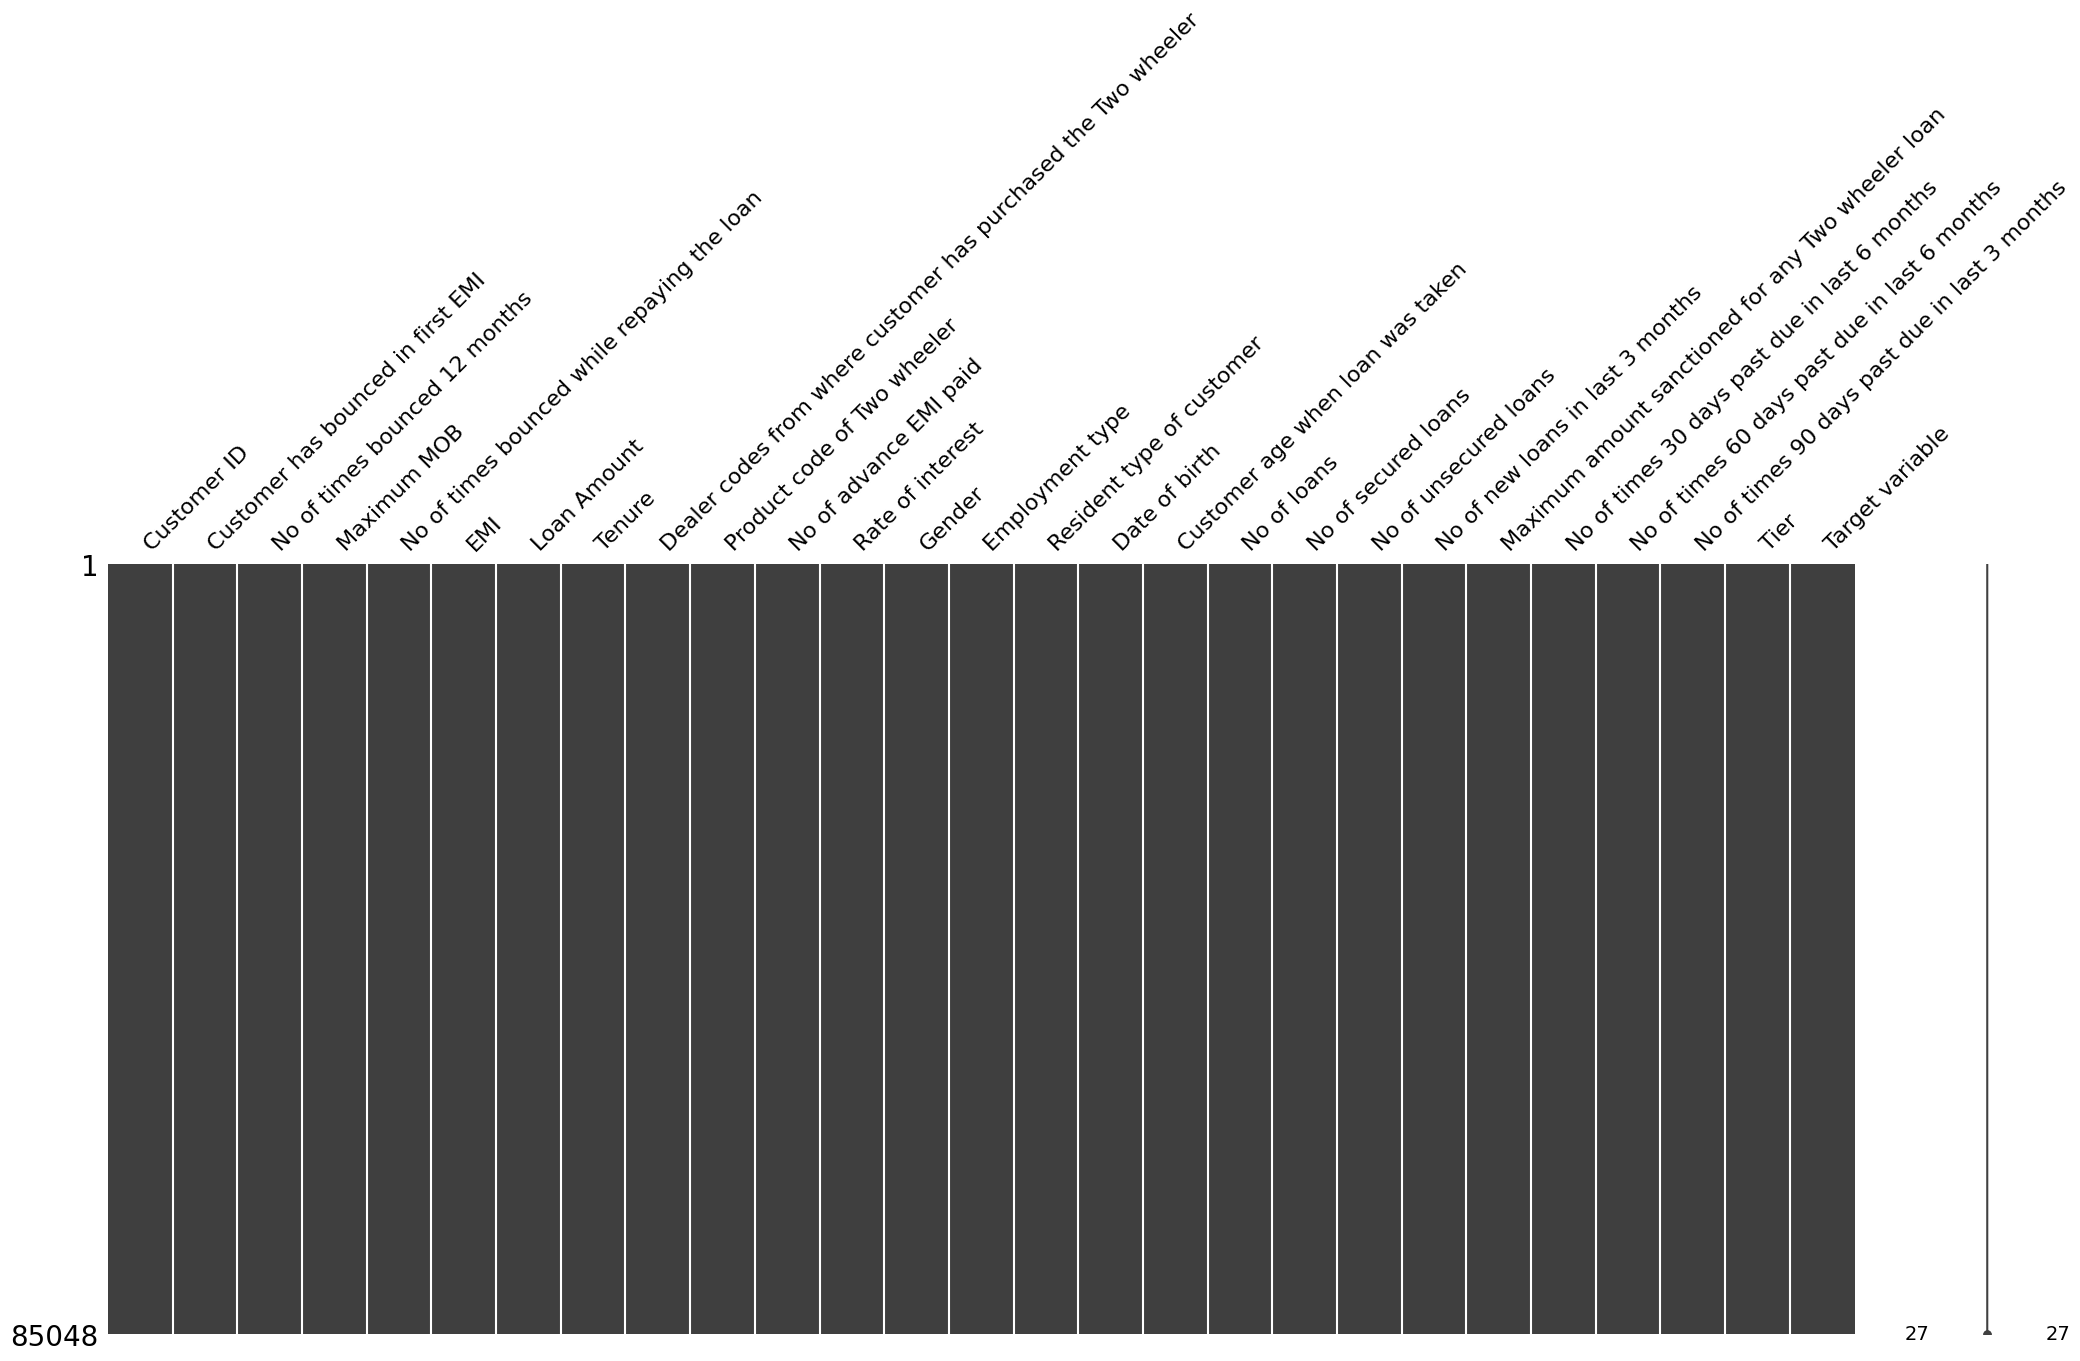

In [154]:
msno.matrix(loan_df)

Dealing with missing values.

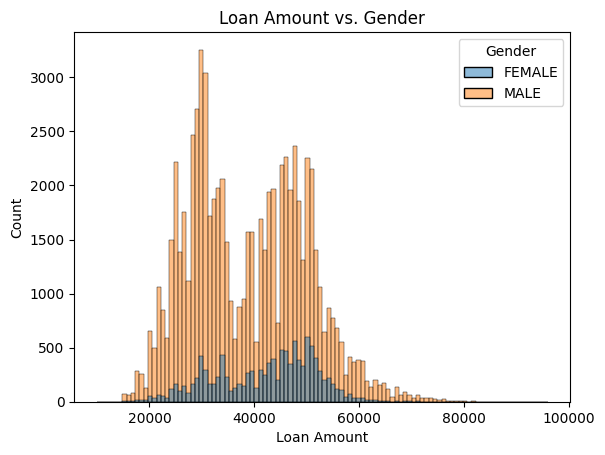

<Figure size 1000x800 with 0 Axes>

In [155]:
sns.histplot(data=loan_df, x='Loan Amount', hue='Gender')
plt.title('Loan Amount vs. Gender')
plt.figure(figsize=(10, 8))
plt.show()

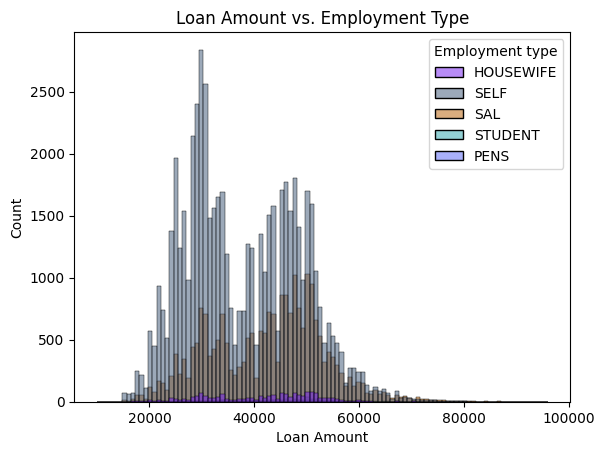

<Figure size 1000x800 with 0 Axes>

In [156]:
colors = ['#' + ''.join(random.choices('0123456789ABCDEF', k=6)) for _ in range(5)]
sns.histplot(data=loan_df, x='Loan Amount', hue='Employment type', palette=colors)
plt.title('Loan Amount vs. Employment Type')
plt.figure(figsize=(10, 8))
plt.show()

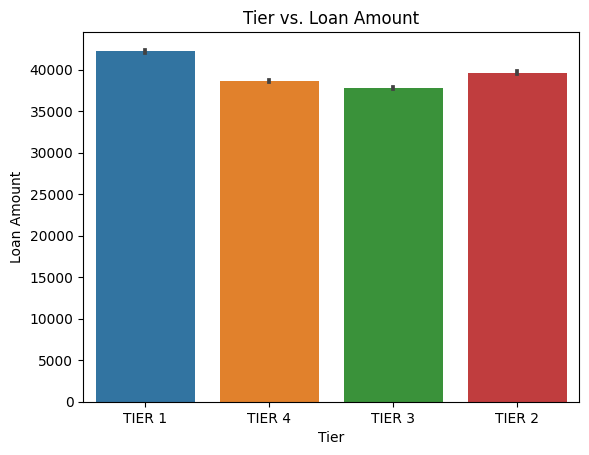

<Figure size 1000x800 with 0 Axes>

In [157]:
sns.barplot(data=loan_df, x='Tier', y='Loan Amount')#violin is also a good option
plt.title('Tier vs. Loan Amount')
plt.figure(figsize=(10, 8)) 
plt.show()

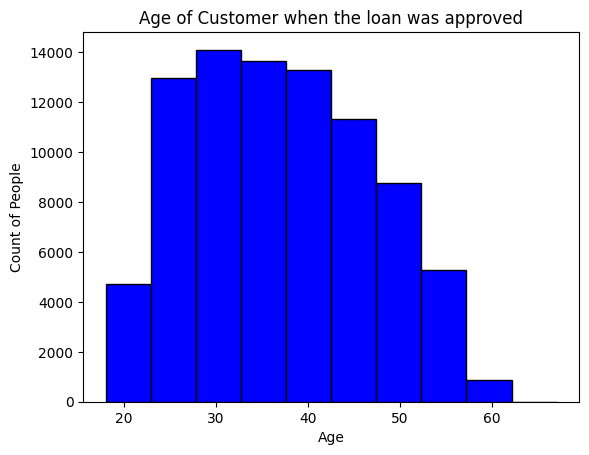

In [158]:
loan_df['Customer age when loan was taken'].plot(kind='hist', color='b', edgecolor='black')
plt.xlabel("Age")
plt.ylabel("Count of People")
plt.title("Age of Customer when the loan was approved")
plt.show()

In [159]:
# import pandas as pd

# # Assuming your DataFrame is named loan_df

# # Filter the data for defaulters (Target variable = 0)
# defaulters = loan_df[loan_df['Target variable'] == 0]

# # Group the data by 'Customer age when loan was taken' and calculate the default rate
# default_rates = defaulters.groupby('Customer age when loan was taken').size() / loan_df.groupby('Customer age when loan was taken').size()

# # Find the age group with the highest default rate
# highest_default_age_group = default_rates.idxmax()

# print("Age group with the highest defaults:", highest_default_age_group)


In [160]:
loan_df = loan_df.drop('Date of birth', axis=1)
loan_df = loan_df.drop('Customer ID', axis=1)

Downsample the data. Split the target variable into defaulters 

In [161]:
loan_df['Target variable'].value_counts()

0    83194
1     1854
Name: Target variable, dtype: int64

In [162]:
defaulters = loan_df[loan_df['Target variable'] == 1]
non_defaulters = loan_df[loan_df['Target variable'] == 0]

In [163]:
print(defaulters.shape)
print(non_defaulters.shape)

(1854, 25)
(83194, 25)


In [164]:
defaulters['Gender'].describe()#check other columns too, AGE ETC

count     1854
unique       2
top       MALE
freq      1669
Name: Gender, dtype: object

In [165]:
defaulters['Loan Amount'].describe()

count     1854.000000
mean     40616.281014
std      10914.378742
min      15900.000000
25%      30900.000000
50%      41250.000000
75%      48900.000000
max      81400.000000
Name: Loan Amount, dtype: float64

In [166]:
non_defaulters['Gender'].describe()

count     83194
unique        2
top        MALE
freq      71939
Name: Gender, dtype: object

In [167]:
non_defaulters['Loan Amount'].describe()

count    83194.000000
mean     39309.596642
std      11017.263308
min      10000.000000
25%      30000.000000
50%      39625.000000
75%      48000.000000
max      96000.000000
Name: Loan Amount, dtype: float64

In [168]:
loan_df.groupby('Target variable').mean()

<ipython-input-168-e276b3d4e1eb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  loan_df.groupby('Target variable').mean()


,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,No of advance EMI paid,Rate of interest,Customer age when loan was taken,No of loans,No of secured loans,No of unsecured loans,No of new loans in last 3 months,Maximum amount sanctioned for any Two wheeler loan,No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months
Target variable,,,,,,,,,,,,,,,,,,,
0,0.028512,0.465683,17.205087,0.679580,2325.572698,39309.596642,21.043849,3510.901652,0.645083,11.700563,37.064235,3.676924,2.271835,0.908046,0.0,36157.093372,1.002632,0.764334,0.321261
1,0.042071,0.873786,17.758360,1.196872,2331.471953,40616.281014,21.786947,3593.040453,0.592233,11.849186,34.284790,3.540453,2.026969,1.134304,0.0,37994.922869,4.805825,3.806904,1.566882


In [169]:
non_defaulters_sample = non_defaulters.sample(n=1854)

In [170]:
semi_final = pd.concat([non_defaulters_sample, defaulters], axis = 0)
semi_final.head()
semi_final.shape

(3708, 25)

Divide the data into categorical and numerical data, encode the categorical data

In [171]:
categorical_values = semi_final.select_dtypes(include=['object']) 
numerical_values = semi_final.select_dtypes(exclude=['object'])

In [172]:
columns_to_norminal_encode = ['Product code of Two wheeler',	'Gender',	
                             'Employment type', 'Resident type of customer', 'Tier']

In [173]:
encoded_df = pd.get_dummies(semi_final, columns=columns_to_norminal_encode)
encoded_df.shape

(3708, 39)

In [174]:
encoded_df.head()

,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,No of advance EMI paid,Rate of interest,Customer age when loan was taken,No of loans,No of secured loans,No of unsecured loans,No of new loans in last 3 months,Maximum amount sanctioned for any Two wheeler loan,No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Target variable,Product code of Two wheeler_MC,Product code of Two wheeler_MO,Product code of Two wheeler_SC,Product code of Two wheeler_TL,Gender_FEMALE,Gender_MALE,Employment type_HOUSEWIFE,Employment type_PENS,Employment type_SAL,Employment type_SELF,Employment type_STUDENT,Resident type of customer_OWENED BY OFFICE,Resident type of customer_OWNED,Resident type of customer_RENT,Resident type of customer_Unknown,Tier_TIER 1,Tier_TIER 2,Tier_TIER 3,Tier_TIER 4
26837,0,1,14.0,1.0,1585.0,23000.0,18.0,1080.0,0.0,16.00,45.0,1,1,0,0,23000.0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
27273,0,2,19.0,2.0,2382.0,48540.0,24.0,1228.0,1.0,8.88,31.0,3,2,1,0,54000.0,2,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
52086,0,0,18.0,0.0,1932.0,49500.0,36.0,3798.0,0.0,13.50,34.0,5,1,4,0,49500.0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
15316,0,1,21.0,1.0,2330.0,47475.0,24.0,3715.0,1.0,8.88,40.0,1,1,0,0,47475.0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
44524,0,2,13.0,2.0,2178.0,32000.0,18.0,1125.0,1.0,15.00,42.0,1,1,0,0,32000.0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1


Split the data into training and testing data. Save it to a df called final_df

In [205]:
X_train, X_test, y_train, y_test = train_test_split(encoded_df, encoded_df['Target variable'], test_size=0.3, random_state=42)

X_train = X_train.drop('Target variable', axis=1)
X_test = X_test.drop('Target variable', axis=1)

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)


In [206]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2595, 38) (1113, 38) (2595,) (1113,)


In [207]:
final_df_train = pd.DataFrame(data=X_train_standardized, columns=X_train.columns)
final_df_test = pd.DataFrame(data=X_test_standardized, columns=X_test.columns)

final_df_train['Target variable'] = y_train
final_df_test['Target variable'] = y_test

final_df = pd.concat([final_df_train, final_df_test], ignore_index=True)

In [208]:
final_df.shape

(3708, 39)

In [209]:
final_df.head()

,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,No of advance EMI paid,Rate of interest,Customer age when loan was taken,No of loans,No of secured loans,No of unsecured loans,No of new loans in last 3 months,Maximum amount sanctioned for any Two wheeler loan,No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Product code of Two wheeler_MC,Product code of Two wheeler_MO,Product code of Two wheeler_SC,Product code of Two wheeler_TL,Gender_FEMALE,Gender_MALE,Employment type_HOUSEWIFE,Employment type_PENS,Employment type_SAL,Employment type_SELF,Employment type_STUDENT,Resident type of customer_OWENED BY OFFICE,Resident type of customer_OWNED,Resident type of customer_RENT,Resident type of customer_Unknown,Tier_TIER 1,Tier_TIER 2,Tier_TIER 3,Tier_TIER 4,Target variable
0,-0.194936,-0.648881,-1.080198,-0.721548,0.556277,-0.586606,-1.142282,1.421654,-0.620364,0.521299,-0.882450,-0.620147,-0.579788,-0.363318,0.0,-2.068368,-0.449908,-0.386534,-0.323865,-0.686966,-0.595302,-0.712017,3.361336,-0.360187,0.360187,-0.126701,-0.043937,1.715742,-1.618409,-0.070957,-0.043937,-2.541042,2.661600,-0.092468,1.983295,-0.541271,-0.585805,-0.678474,NaN
1,-0.194936,-0.648881,-0.115470,-0.721548,0.460757,0.880108,0.427012,4.660488,-0.620364,0.203285,-1.089181,-0.254982,-0.009883,-0.363318,0.0,0.704217,-0.449908,-0.386534,-0.323865,1.455675,-0.595302,-0.712017,-0.297501,-0.360187,0.360187,-0.126701,-0.043937,-0.582838,0.617891,-0.070957,-0.043937,0.393539,-0.375714,-0.092468,1.983295,-0.541271,-0.585805,-0.678474,NaN
2,-0.194936,-0.648881,-0.887252,-0.721548,-0.632410,-1.047837,-0.619184,-0.629402,0.405015,0.965468,0.874762,0.840512,0.560023,0.010665,0.0,-0.457046,-0.449908,-0.386534,-0.323865,-0.686966,1.679820,-0.712017,-0.297501,-0.360187,0.360187,-0.126701,-0.043937,-0.582838,0.617891,-0.070957,-0.043937,0.393539,-0.375714,-0.092468,-0.504211,-0.541271,-0.585805,1.473897,NaN
3,-0.194936,0.279882,-1.466089,0.013021,0.108750,-1.398372,-1.665380,0.393181,-0.620364,0.702646,0.564666,-0.072400,-0.294836,-0.363318,0.0,-0.668185,-0.449908,-0.386534,-0.323865,-0.686966,1.679820,-0.712017,-0.297501,-0.360187,0.360187,-0.126701,-0.043937,-0.582838,0.617891,-0.070957,-0.043937,0.393539,-0.375714,-0.092468,-0.504211,1.847502,-0.585805,-0.678474,NaN
4,-0.194936,3.066170,-0.501361,2.216730,-0.796916,-1.561832,-1.142282,-0.179252,-0.620364,1.346559,-0.262257,-0.437565,-0.294836,-0.363318,0.0,-0.766642,-0.292710,-0.386534,-0.323865,-0.686966,1.679820,-0.712017,-0.297501,-0.360187,0.360187,-0.126701,-0.043937,-0.582838,0.617891,-0.070957,-0.043937,0.393539,-0.375714,-0.092468,-0.504211,-0.541271,1.707052,-0.678474,NaN


Model the data. Use different algorithms to see has better accuracy.

In [210]:
model = LogisticRegression(max_iter=3000)

In [211]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [212]:
X_train_predictions = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_predictions, y_train)

In [213]:
training_data_accuracy

0.7267822736030829

In [214]:
X_test_predictions = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_predictions, y_test)

In [215]:
testing_data_accuracy

0.7241689128481581

In [217]:
model = RandomForestClassifier(max_depth=4,min_samples_leaf=3, random_state = 10) 
model.fit(X_train, y_train)

yhat = model.predict(X_test)
print(f'Train accuracy: {accuracy_score(y_test,yhat)}')

pred_train = model.predict(X_train)
print(f'Test accuracy: {accuracy_score(y_train,pred_train)}')

Train accuracy: 0.756513926325247
Test accuracy: 0.7714836223506744
